In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

---
## 外れ値の削除
---

In [2]:
A=pd.read_csv('./train.csv')
numerical_var=A.dtypes[A.dtypes !='object'].index
numerical_var

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

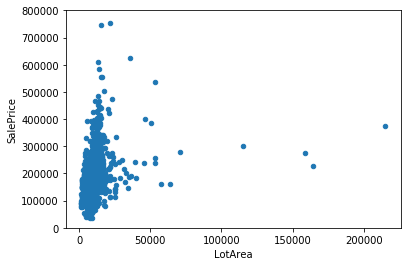

In [4]:
var='LotArea'
A.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

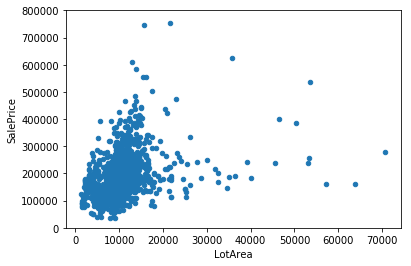

In [5]:
A.drop(A[A['LotArea']>=100000].index,inplace=True)
A.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

---
## 欠損値処理
---

In [6]:
A=pd.read_csv('./train.csv')
for i in A.columns:
    if A[i].isnull().sum()>0:
        print('{0}: {1}'.format(i,A[i].isnull().sum()))

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


#### 処理方法： *LotFrontage* を例として

In [7]:
A=pd.read_csv('./train.csv')
#中位数
A.loc[A['LotFrontage'].isnull()==True,'LotFrontage']=A['LotFrontage'].median()

In [8]:
A=pd.read_csv('./train.csv')
#平均数
A.loc[A['LotFrontage'].isnull()==True,'LotFrontage']=A['LotFrontage'].mean()

In [9]:
A=pd.read_csv('./train.csv')
#最頻値
A.loc[A['LotFrontage'].isnull()==True,'LotFrontage']=A['LotFrontage'].mode()

In [10]:
A=pd.read_csv('./train.csv')
#0
A.loc[A['LotFrontage'].isnull()==True,'LotFrontage']=0

In [11]:
A=pd.read_csv('./train.csv')
#カラム削除
A.drop('LotFrontage',axis=1,inplace=True)
#などなど

---
## 追加変数
---

### 量的変数のbin
#### 地域別物件価格中位数を用いて分類する

In [15]:
A=pd.read_csv('./train.csv')
neighbor_price=dict(A['SalePrice'].groupby(A['Neighborhood']).median())
A['neighbor_bins']=0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,neighbor_bins
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,0


In [13]:
for i in neighbor_price:
    if neighbor_price[i]<=100000:
        neighbor_price[i]=1
    elif (neighbor_price[i]>100000) & (neighbor_price[i]<=200000):
        neighbor_price[i]=2
    elif (neighbor_price[i]>200000) & (neighbor_price[i]<=300000):
        neighbor_price[i]=3
    else:
        neighbor_price[i]=4
        
for i in neighbor_price:
    A.loc[A['Neighborhood']==i,'neighbor_bins']=neighbor_price[i]

In [14]:
A.loc[:,['Neighborhood','neighbor_bins']].head(5)

,Neighborhood,neighbor_bins
0,CollgCr,2
1,Veenker,3
2,CollgCr,2
3,Crawfor,3
4,NoRidge,4


---
### 質的変数のカテゴリーの統合
---

In [ ]:
A=pd.read_csv('./train.csv')
obj_var=A.dtypes[A.dtypes =='object'].index
obj_var

In [ ]:
A['LandSlope'].value_counts()

In [ ]:
A.loc[A['LandSlope']!='Gtl','LandSlope']='NoGtl'
A['LandSlope'].value_counts()

---
## 正規化
---

In [ ]:
A=pd.read_csv('./train.csv')
B=pd.DataFrame()
B['SalePrice']=A['SalePrice']
B['SalePrice']=np.log1p(B['SalePrice'])    #対数をとる：　log(1+x); 指数関数 exp(x)-1 のコマンド：　np.expm1 ; log,expを使っても構わない
D=B

scaler = StandardScaler()
scaler.fit(D)
C=pd.DataFrame(scaler.transform(D))
C.columns=['SalePrice']

fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.distplot(A['SalePrice'],fit=norm,ax=ax[0])
sns.distplot(B['SalePrice'],fit=norm,ax=ax[1])
sns.distplot(C['SalePrice'],fit=norm,ax=ax[2])